In [8]:
#IQR

#아래기준 변은 1사분위수(Q1)

#중간 선은 2사분위수(Q2)

#맨 위에 선은 3사분위수(Q3)

#극단치는?

#극단치 경계를 넘어가는 점들을 극단치, 이상치라 한다.

#- 아랫수염 : 하위 0~25% 내에 해당하는 값
#- Q1 하위 25% 위치 값
#- Q2 하위 50% 중앙값
#- Q3 하위 75%값
#- 윗수염 75~100%내에 해당하는 값
#- 극단치 경계 Q1, Q3 밖 1.5IQR 내 최대값
#- 극단치 : Q1, Q3 밖 1.5IQR 벗어난 값

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
mpg = pd.read_csv('mpg.csv')

<AxesSubplot:ylabel='hwy'>

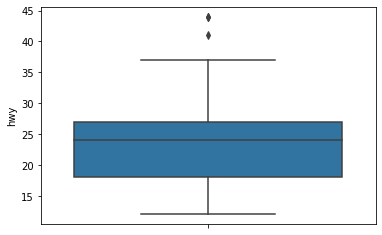

In [6]:
sns.boxplot(data=mpg, y='hwy')

In [9]:
#분위수 구하기
# df.quantile() 이용하기

In [14]:
#1사분위수 구하기

pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [15]:
#3사분위수 구하기

pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [17]:
#IQR 구하기. 3분위수와 1분위수의 차
iqr = pct75- pct25
iqr

9.0

In [19]:
#하한, 상한 구하기
# 극단치의 경계 
# 하한: 1사분위수보다 'IQR의 1.5배만큼 더 작은 값'
# 상한: 3사분위수보다 'IQR의 1.5배만큼 더 큰 값'
pct25 - 1.5 * iqr
pct75 + 1.5 * iqr

40.5

In [20]:
import numpy as np

In [22]:
#극단치, 이상치를 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5)| (mpg['hwy']>40.5), np.nan, mpg['hwy'])
mpg['hwy'].isna().sum() # 결측치가 3개가 나옴!

3

In [23]:
#결측치를 제거하고 분석
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [61]:
##판다스에 대해서 들어가기

In [64]:
df = pd.read_csv('gapminder.tsv',sep='\t')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [66]:
#몇행 몇열
df.shape

(1704, 6)

In [68]:
#컬럼만 추출
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [70]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [72]:
#열 단위로 추출하기
df[['year','gdpPercap']]

,continent,gdpPercap
0,Asia,779.445314
1,Asia,820.853030
2,Asia,853.100710
3,Asia,836.197138
4,Asia,739.981106
...,...,...
1699,Africa,706.157306
1700,Africa,693.420786
1701,Africa,792.449960
1702,Africa,672.038623


In [74]:
#loc 인덱스기준, iloc 행번호 기준

df.loc[1702]  #인덱스 번호가 1702

country        Zimbabwe
continent        Africa
year               2002
lifeExp          39.989
pop            11926563
gdpPercap    672.038623
Name: 1702, dtype: object

In [77]:
#다양한 인덱스를 추출 가능
df_new = df.loc[[0,1,23,1234]]
df_new

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
23,Albania,Europe,2007,76.423,3600523,5937.029526
1234,Poland,Europe,2002,74.670,38625976,12002.239080


In [79]:
#슬라이싱 가능
df.loc[0:23,['year','pop','lifeExp']] #앞은 행, 뒤는 열 

,country,year,lifeExp,pop
0,Afghanistan,1952,28.801,8425333
1,Afghanistan,1957,30.332,9240934
2,Afghanistan,1962,31.997,10267083
3,Afghanistan,1967,34.020,11537966
4,Afghanistan,1972,36.088,13079460
5,Afghanistan,1977,38.438,14880372
6,Afghanistan,1982,39.854,12881816
7,Afghanistan,1987,40.822,13867957
8,Afghanistan,1992,41.674,16317921
9,Afghanistan,1997,41.763,22227415


In [80]:
df.iloc[0:23,[0,2,3,4]]

,country,year,lifeExp,pop
0,Afghanistan,1952,28.801,8425333
1,Afghanistan,1957,30.332,9240934
2,Afghanistan,1962,31.997,10267083
3,Afghanistan,1967,34.020,11537966
4,Afghanistan,1972,36.088,13079460
5,Afghanistan,1977,38.438,14880372
6,Afghanistan,1982,39.854,12881816
7,Afghanistan,1987,40.822,13867957
8,Afghanistan,1992,41.674,16317921
9,Afghanistan,1997,41.763,22227415


In [81]:
#range값 적용 가능
a_range = list(range(5))

In [84]:
df.iloc[:, a_range]

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083
3,Afghanistan,Asia,1967,34.020,11537966
4,Afghanistan,Asia,1972,36.088,13079460
...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418
1700,Zimbabwe,Africa,1992,60.377,10704340
1701,Zimbabwe,Africa,1997,46.809,11404948
1702,Zimbabwe,Africa,2002,39.989,11926563
